<center>
    <h1> ILI285 - Computación Científica I  / INF285 - Computación Científica </h1>
    <h2> Tarea 4 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
</center>

_Mayo 2017_

<div id='obj' />
# 1. Objetivos

<ul>
<li>Analizar distintos métodos iterativos para resolver sistemas de ecuaciones lineales y diferenciar el desempeño bajo distintos problemas</li>
</ul>

<div id='obj' />
# 2. Hints

* _Markdown_ https://help.github.com/articles/basic-writing-and-formatting-syntax/
* _numpy_ http://www.numpy.org
* _scipy_ https://www.scipy.org/scipylib/index.html
* _ipywidgets_ https://github.com/ipython/ipywidgets
 http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb

In [1]:
%matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.mlab as mlab
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact
from ipywidgets import widgets
import matplotlib
import matplotlib.cm as cm

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16


#  Métodos Iterativos



<h3> Método de Newton </h3>
<p style="font-size:16px"> El método de Newton, consiste en encontrar de forma iterativa aproximaciones a las raices o ceros de una función real.</p>

$$ f(r) = 0$$
<p style="font-size:16px"> Para iniciar el método es necesario: una función $f$ definida sobre números reales, definir un punto de inicio $x_0$ ,y finalmente la derivada de la función $f'$. Una primera aproximación es encontrada, y luego se repite el siguiente proceso hasta alcanzar un criterio de convergencia:</p>

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'({x_n})}$$

<p style="font-size:16px"> Para casos mas grandes, por ejemplo, resolver un sistema de $k$ ecuaciones<b> no lineales</b>, es necesario encontrar la raiz de $k$ ecuaciones, de modo que $F : \mathbb{R}^k \rightarrow \mathbb{R}^k$. Esto significa:

<p style="font-size:16px">
$$F(\mathbf{r})=
\begin{bmatrix}
   f_1(\mathbf{r})\\
   \vdots\\
   f_k(\mathbf{r})
\end{bmatrix}
=
\begin{bmatrix}
   f_1(r_1,r_2,\dots,r_k)\\
   \vdots\\
   f_k(r_1,r_2,\dots,r_k)
\end{bmatrix}=\mathbf{0}
$$

<p style="font-size:16px">
Dada la fórmula mencionada anteriormente se puede encontrar la siguiente extensión donde uno debe reemplazar la derivada $f'(x_n)$ por la matriz Jacobiana de $k \times k $ dimensiones 
$\left.J_F\right|_{\mathbf{x}=\mathbf{x}_n}$ o simplemente $J_{\mathbf{x}_n}$, donde $\mathbf{x}=\langle x_1,x_2,\dots,x_k\rangle^T$:

<p style="font-size:16px">
$$ \left.J_F\right|_{\mathbf{x}=\mathbf{x}_n} = J_{\mathbf{x}_n} = 
\begin{bmatrix}
   \frac{\partial f_1(\mathbf{x}_n)}{\partial x_1} & \cdots & \frac{\partial f_1(\mathbf{x}_n)}{\partial x_k} \\
   \vdots & \ddots & \vdots \\
   \frac{\partial f_k(\mathbf{x}_n)}{\partial x_1} & \cdots & \frac{\partial f_k(\mathbf{x}_n)}{\partial x_k}
\end{bmatrix}
$$

<p style="font-size:16px"> Donde en cada paso es necesario resolver un sistema de ecuaciones lineales: </p>

<p style="font-size:16px">
$$J_{\mathbf{x}_n}\,(\mathbf{x}_{n+1} - \mathbf{x}_n) = -F(\mathbf{x}_n)$$

o

<p style="font-size:16px">
$$\mathbf{x}_{n+1} =\mathbf{x}_n -J_{\mathbf{x}_n}^{-1}\,F(\mathbf{x}_n)$$

<p style="font-size:16px"> Vamos a buscar las raíces de la figuiente función vectorial usando el método de Newton acoplado con PALU y Gauss-Seidel : </p>
<br>
$$
F(\mathbf{x})=
\begin{bmatrix}
   f_1(\mathbf{x})\\
   f_2(\mathbf{x})
\end{bmatrix}
=\begin{bmatrix}
   y - x^2\\
   x^2 + y^2 - 1
\end{bmatrix}
$$

<p style="font-size:16px"> A continuación se les entregará una función para visualizar los resultados de los métods iterativos al analizar paso a paso. </p>

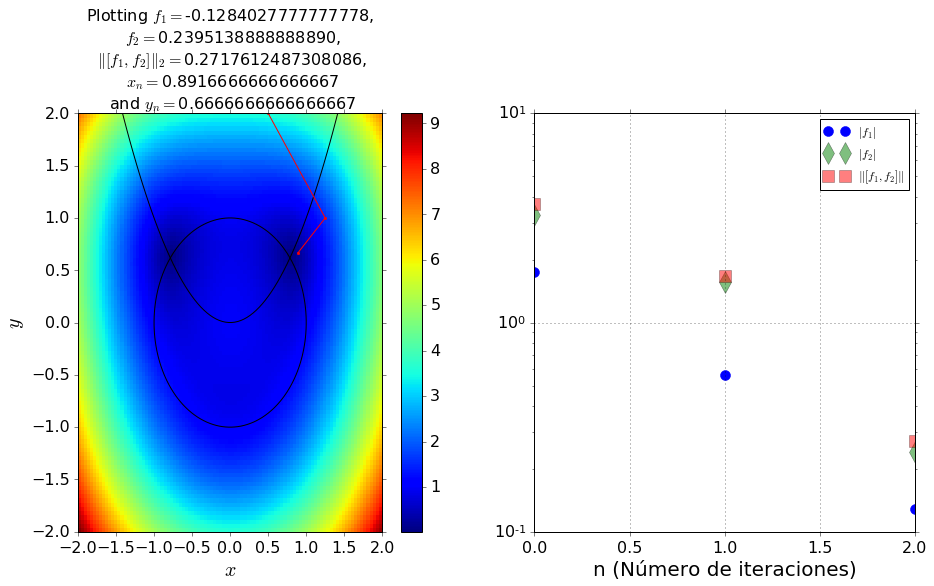

<function __main__.visual>

In [3]:
def visual(n_steps_newton=2,x00=0.5,x01=2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-np.linalg.solve(JM(xs[0,n],xs[1,n]),b).T

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

interact(visual,n_steps_newton=(1,10),x00=(-2,2,0.1),x01=(-2,2,0.1))

<h3> PALU: </h3>
<p style="font-size:16px"><b>a) </b> Dentro de la función visual, reemplazar la <code>función np.linalg.solve</code> (destacado en comentarios) con el método <b>PALU</b> para resolver el sistema de ecuaciones, para los puntos iniciales indicados más abajo, ¿Que observaciones puede destacar del comportamiento del método  y las soluciones encontradas? ¿Existen mejoras si aumenta el número de iteraciones? ¿Cuantas iteraciones se necesitan para saturar la solución?</p>

1. **(5 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
2. **(10 puntos)** $\mathbf{x}_0=\langle0,2\rangle$
3. **(15 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$

<h3> Métodos Iterativos: </h3>
<p style="font-size:16px"><b>b)</b> (1) Acople el método iterativo de <b>Gauss-Seidel</b> al visualizador (llamelo visual2), (2) incluya un cuarto parametro al widget para controlar el número de iteraciones de <b>Gauss-Seidel</b>, (3) use el algoritmo implementado para los siguientes puntos iniciales indicados más abajo. En ambos casos ¿Como afecta el número de iteraciones en la convergencia de la solución? </p>

1. **(30 puntos)** Construir visual2: (1) Acoplando Gauss-Seidel y (2) Incluyendo un cuarto parámetro al widget
2. **(10 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
3. **(10 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$

<p style="font-size:16px"><b>c) (20 Puntos)</b> Respecto al análisis realizado en el punto anterior, ¿Que información se desprende del segundo gráfico? ¿Que medida corresponde la curva $\|[f_1 , f_2]\|_2$ ? </p>

# Instrucciones:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea4-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.